In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
mydata = pd.read_csv('Mall_Customers.csv')
mydata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = mydata.iloc[:,3:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)
pd.DataFrame(x_sc)

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [5]:
mydata.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

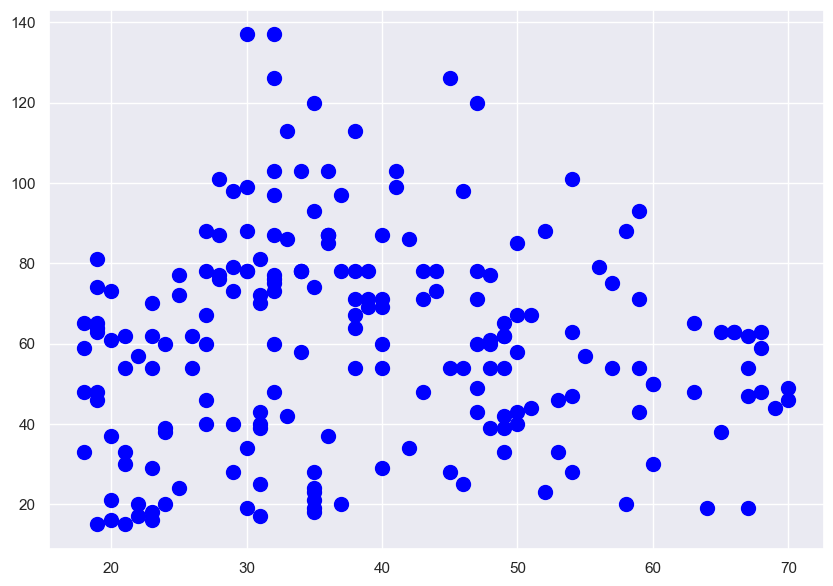

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(mydata[['Age']], mydata[['Annual Income (k$)']], s=100, c='blue')
plt.show()

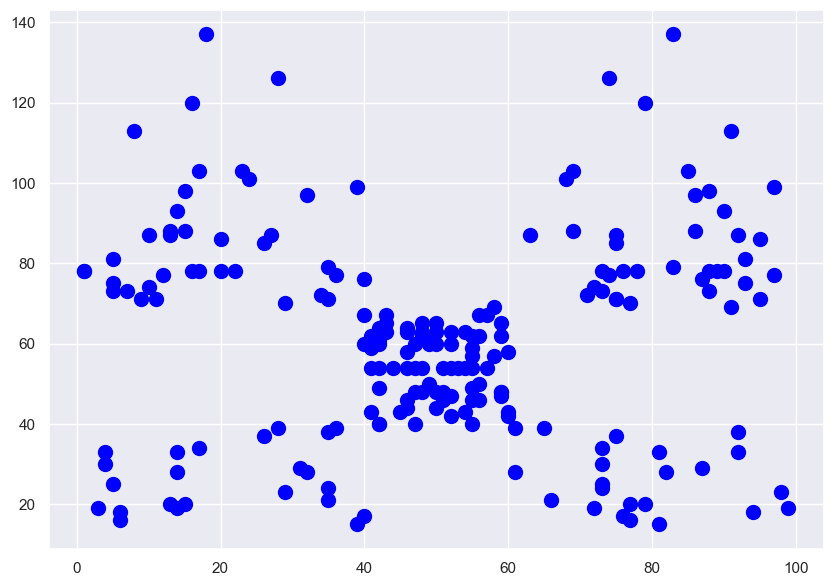

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(mydata[['Spending Score (1-100)']], mydata[['Annual Income (k$)']], s=100, c='blue')
plt.show()

In [8]:
from sklearn.cluster import KMeans

In [10]:
#kmeans = KMeans(n_clusters=8, init='k-means++')

wcss = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(x_sc)
    wcss.append(kmeans.inertia_)

In [12]:
len(wcss)

14

In [13]:
wcss

[399.99999999999994,
 269.14250704479224,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.10377812115057,
 44.91118554999014,
 37.15135706793106,
 33.85410621736368,
 29.07617685124427,
 26.230634148456048,
 23.37409986508554,
 21.2609650798953,
 18.86230750576736]

In [14]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

<AxesSubplot:>

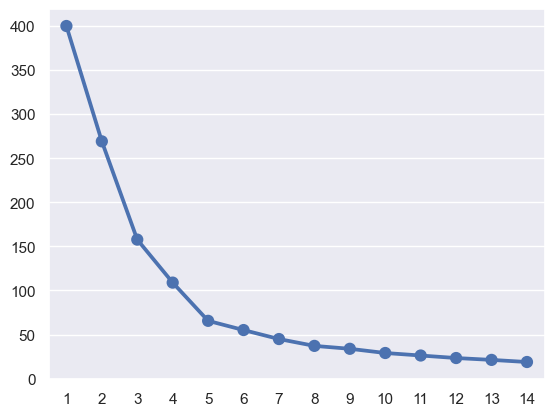

In [15]:
sns.pointplot(a, wcss)

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=1)
y_kmeans = kmeans.fit_predict(x_sc)
y_kmeans

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [19]:
combined = pd.concat([mydata, pd.DataFrame(y_kmeans)], axis=1)
combined.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
5,6,Female,22,17,76,0
6,7,Female,35,18,6,4
7,8,Female,23,18,94,0
8,9,Male,64,19,3,4
9,10,Female,30,19,72,0


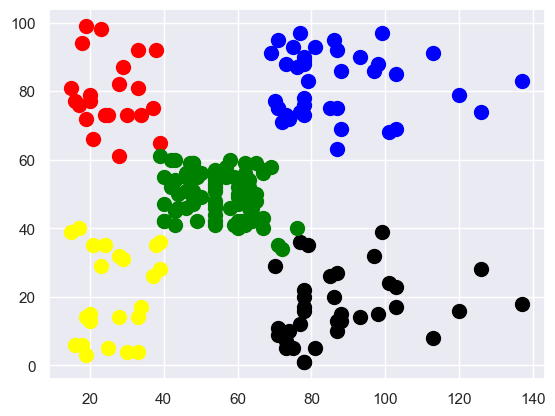

In [24]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='red', label='Cluster0')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='black', label='Cluster1')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label='Cluster2')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s=100, c='blue', label='Cluster3')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1], s=100, c='yellow', label='Cluster4')
plt.show()

In [23]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Silhouette Score

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
silhouette_score(x, y_kmeans)

0.553931997444648

In [ ]:
# Silhouette score range is between -1 and +1
# -1 : clustering is wrong
# 0 = same cluster
# 1 = Cluster are far awary

In [27]:
combined.to_csv('final_report_clustering.csv')

# Hierarichal Cluster

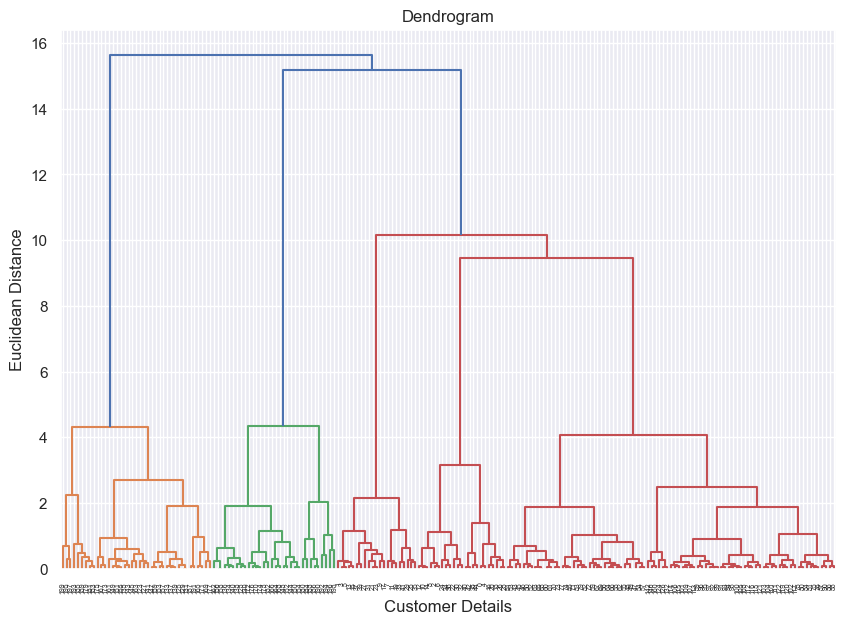

In [28]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(x_sc, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customer Details")
plt.ylabel("Euclidean Distance")
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
hc

AgglomerativeClustering(n_clusters=5)

In [31]:
y_hc = hc.fit_predict(x_sc)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [32]:
combined_hc = pd.concat([mydata, pd.DataFrame(y_hc)], axis=1)
combined_hc

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


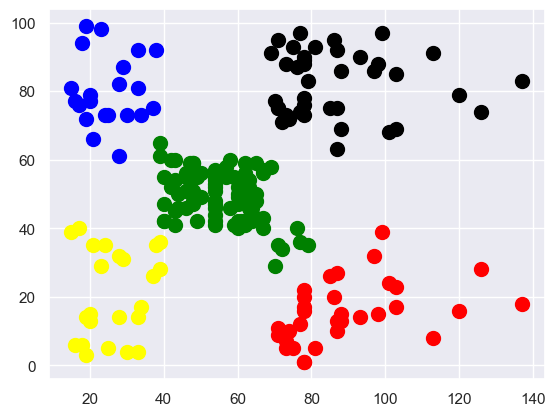

In [33]:
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='HieraricalCluster0')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='black', label='HieraricalCluster1')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='green', label='HieraricalCluster2')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1], s=100, c='blue', label='HieraricalCluster3')
plt.scatter(x[y_hc==4,0], x[y_hc==4,1], s=100, c='yellow', label='HieraricalCluster4')
plt.show()

In [34]:
silhouette_score(x, y_hc)

0.5529945955148897

# Association Rule Mining

In [36]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [38]:
transaction  = []

for i in range(0, 7501):
    transaction.append([str(dataset.values[i, j]) for j in range(0,20)])

In [39]:
transaction

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

# Building Association Rule Mining 

In [40]:
!pip install apyori


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from apyori import apriori

In [42]:
rules = apriori(transaction, min_support=0.01,min_confidence=0.2,min_lift=2,min_length=2)

In [43]:
results = list(rules)

In [44]:
results

[RelationRecord(items=frozenset({'shrimp', 'frozen vegetables'}), support=0.01666444474070124, ordered_statistics=[OrderedStatistic(items_base=frozenset({'shrimp'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23320895522388058, lift=2.44657394843962)]),
 RelationRecord(items=frozenset({'tomatoes', 'frozen vegetables'}), support=0.0161311825089988, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomatoes'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23586744639376217, lift=2.4744639376218323)]),
 RelationRecord(items=frozenset({'grated cheese', 'ground beef'}), support=0.011331822423676844, ordered_statistics=[OrderedStatistic(items_base=frozenset({'grated cheese'}), items_add=frozenset({'ground beef'}), confidence=0.2162849872773537, lift=2.201294015695292)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=fro

In [53]:
rules = apriori(transaction, min_support=0.05,min_confidence=0.3,min_lift=1.1,min_length=2)

In [54]:
results = list(rules)
results

[RelationRecord(items=frozenset({'mineral water', 'chocolate'}), support=0.05265964538061592, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.3213995117982099, lift=1.3483320682317521)]),
 RelationRecord(items=frozenset({'mineral water', 'spaghetti'}), support=0.05972536995067324, ordered_statistics=[OrderedStatistic(items_base=frozenset({'spaghetti'}), items_add=frozenset({'mineral water'}), confidence=0.3430321592649311, lift=1.4390851379453289)]),
 RelationRecord(items=frozenset({'mineral water', 'nan', 'chocolate'}), support=0.05265964538061592, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'nan', 'mineral water'}), confidence=0.3213995117982099, lift=1.3490865909336163), OrderedStatistic(items_base=frozenset({'nan', 'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.3213995117982099, lift=1.3483320682317521)]),
 RelationRecord(items=froze